In [2]:
import torch as pt
import torch.optim as optim
import imageio
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable

from mdfloss import MDFLoss

In [3]:
def read_convert_pt_image(image_path):
    '''
    Function to read an image and convert it to pytorch tensor
    '''
    image = imageio.imread(image_path)
    image = pt.from_numpy(imageio.core.asarray(image/255.0))
    image = image.type(dtype=pt.float64)

    image = image.permute(2,0,1)
    return image


In [4]:
cuda_available = False
path_disc = "./weights/Ds_stone.pth"
epochs = 5

# Read reference images
imgr = read_convert_pt_image('./misc/i10.png')
imgr = imgr.unsqueeze(0).type(pt.FloatTensor)
# Create a noisy image 
imgd = pt.rand(imgr.size())

# Save the original state
imgdo = imgd.detach().clone()

if cuda_available:
    imgr = imgr.cuda()
    imgd = imgd.cuda()

# Convert images to variables to support gradients
imgrb = Variable( imgr, requires_grad = False)
imgdb = Variable( imgd, requires_grad = True)

optimizer = optim.Adam([imgdb], lr=0.1)

# Initialise the loss
criterion = MDFLoss(path_disc, cuda_available=cuda_available)

# Iterate over the epochs optimizing for the noisy image
for ii in range(0,epochs):
    
    optimizer.zero_grad()
    loss = criterion(imgrb,imgdb,8,1) 
    print("Epoch: ",ii," loss: ", loss.item())
    loss.backward()
    optimizer.step()
 
    

/usr/local/lib/python3.8/site-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.8/site-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.8/site-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.activation.LeakyReLU' has changed. you can retrieve the original source code by accessing the object's source attribute o

Epoch:  0  loss:  46.921382904052734
Epoch:  1  loss:  22.345155715942383
Epoch:  2  loss:  12.346396446228027
Epoch:  3  loss:  9.2787446975708
Epoch:  4  loss:  8.58956241607666


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


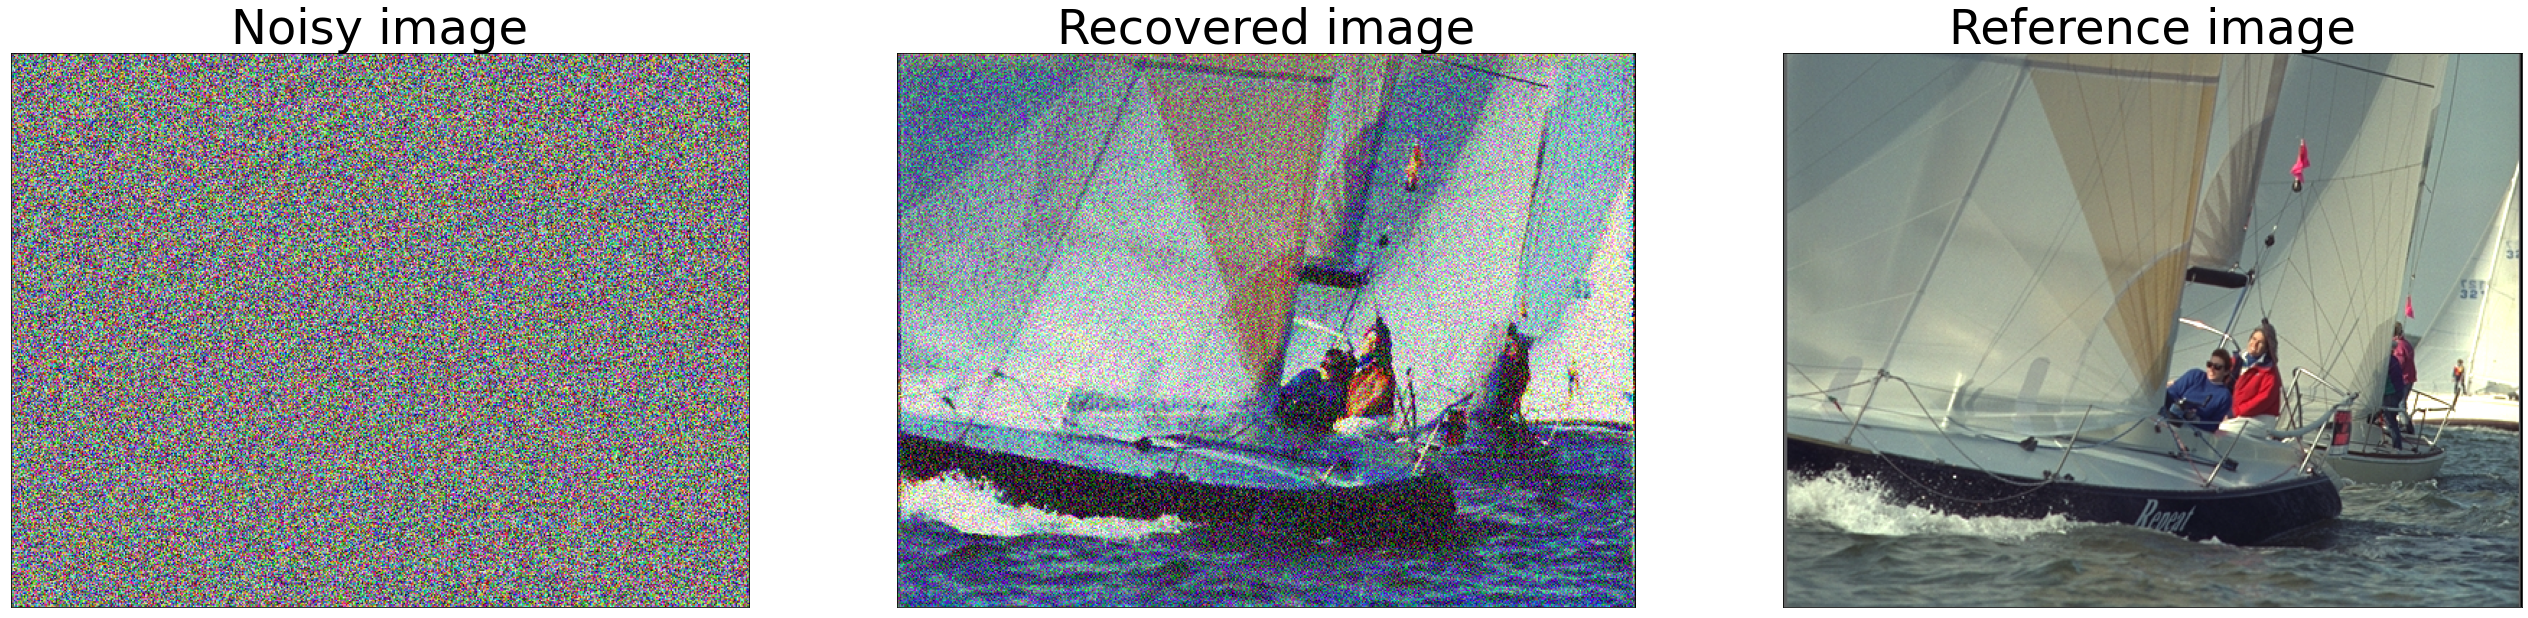

In [5]:
# Convert images to numpy
imgrnp = imgr.cpu().squeeze(0).permute(1,2,0).data.numpy()
imgdnp = imgd.cpu().squeeze(0).permute(1,2,0).data.numpy()
imgdonp = imgdo.cpu().squeeze(0).permute(1,2,0).data.numpy()


# Plot optimization results
fig, axs = plt.subplots(1, 3,figsize=(45,15))


axs[0].imshow(imgdonp)
axs[0].set_title('Noisy image',fontsize=48)
axs[1].imshow(imgdnp)
axs[1].set_title('Recovered image',fontsize=48)
axs[2].imshow(imgrnp)
axs[2].set_title('Reference image',fontsize=48)

# Remove the ticks from the axis
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])